![logo_usjt.png](https://www.usjt.br/app/themes/mobister/dist/images/sao-judas-universidade.png)

# Gerenciamento de Dados e Informação
- **Professores**: 
- Anderson Sanches <anderson.sanches@saojudas.br>
- Sergio Bonato <antonio.bonato@saojudas.br>

# Atividade06 - Visualização de Dados em Python

**Conteúdo**
- Gráficos - Tipos de Visualizações
- Pandas - Visualização de dados
- Seaborn - Dados Estatísticos
- Bokeh - Mapas

In [0]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [10]:
#configuração do notebook para acesso aos datasets
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/aula_pandas/datasets'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#configuração do notebook para acesso local aos datasets
path = './datasets/'

In [0]:
# Importacao das bibliotecas e configuracoes gerais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn aesthetic parameters to defaults
sns.set()
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(9.4, 6.7)})

### Dataset de indicadores


In [13]:
referencias = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out']
cdi = [0.54, 0.49, 0.47, 0.52, 0.54, 0.47, 0.57, 0.50, 0.46, 0.06]
ipca = [0.32, 0.43, 0.75, 0.57, 0.13, 0.01, 0.19, 0.11, -0.04, 0.65]
igpm = [0.01, 0.88, 1.26, 0.92, 0.45, 0.80, 0.40, -0.67, -0.01, 0.25 ]
ibov = [10.82, -1.86, -0.18, 0.98, 0.70, 4.06, 0.84, -0.67, 3.57, 0.65]

df_indicadores = pd.DataFrame(data={'IPCA': ipca, 'CDI': cdi, 'IGPM': igpm, 
                                    'IBOV' : ibov}, index=referencias)
df_indicadores

,IPCA,CDI,IGPM,IBOV
jan,0.32,0.54,0.01,10.82
fev,0.43,0.49,0.88,-1.86
mar,0.75,0.47,1.26,-0.18
abr,0.57,0.52,0.92,0.98
mai,0.13,0.54,0.45,0.70
jun,0.01,0.47,0.80,4.06
jul,0.19,0.57,0.40,0.84
ago,0.11,0.50,-0.67,-0.67
set,-0.04,0.46,-0.01,3.57
out,0.65,0.06,0.25,0.65


#### **Exercício 1**

Apresentar o gráfico dos indicadores IBOV e CDI dos últimos seis meses da série

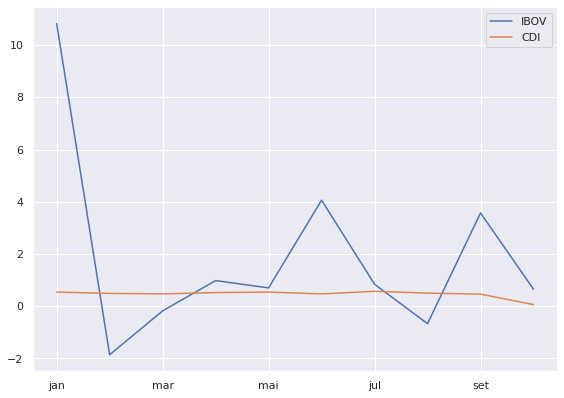

In [14]:
# solução
df_indicadores[['IBOV', 'CDI']].plot()

### Dataset da Bolsa Eletrônica de Compras

In [15]:
# carregamento do dataset da BEC e geração de informações de quantidade negociada
df_bec = pd.read_excel(path+'03-DS_BEC.xlsx', error_bad_lines=False)
df_bec = df_bec[['Cód Desc Órgão', 'Mês Ano Encerramento', 'Cod Desc Fornecedor', 
                 'Descrição Procedimento Compra', 'Cod Desc Item', 
                 'Quantidade de Item','Valor Unitário Negociado', 
                 'Valor Total Negociado em R$']]
df_bec['Quantidade Negociada'] = df_bec['Valor Total Negociado em R$'] / df_bec[
    'Valor Unitário Negociado']  
df_bec.head(4)

FileNotFoundError: ignored

#### Exercício 2

Apresentar o boxplot do Valor Unitário Negociado referente ao item '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO'


In [0]:
# solução
df_bec.loc[df_bec['Cod Desc Item'] == '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO', 
           'Valor Unitário Negociado'].plot.hist(bins=20)

NameError: ignored

#### Exercício 3

Apresentar o histograma do Valor Unitário Negociado referente ao item '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO'

In [0]:
# solução
df_bec.loc[df_bec['Cod Desc Item'] == '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO', 
           'Valor Unitário Negociado'].plot.hist(bins=20)

NameError: ignored

### Uma visão da compra de papel sulfite


A dataset sulfite é uma visão do dataset da BEC que inclui apenas compras de PAPEL SULFITE A4 BRANCO. Veja que a função lambda abaixo se encarrega desta seleção. Como resultado temos 6 tipos diferentes de itens. 

In [16]:
sulfite = df_bec[list(map(lambda x: x.find('PAPEL SULFITE') >=0 
                          and x.find('A4') >=0 
                          and x.find('BRANCO') >=0
                          and x.find('MILIMETRADO') == -1
                          , df_bec['Cod Desc Item']))]
sulfite.groupby('Cod Desc Item')['Cod Desc Item'].count()

NameError: ignored

#### Exercício 4

Usando o sns.barplot crie um gráfico de barras que mostre o valor total negociado por cada um dos 5 tipos de papel sulfite branco a4 não milimetrado. Use a melhor disposição para mostrar os dados (horizontal ou vertical).

In [0]:
# solução
sulfite = df_bec[list(map(lambda x: x.find('PAPEL SULFITE') >=0 
                          and x.find('A4') >=0 
                          and x.find('BRANCO') >=0
                          and x.find('MILIMETRADO') == -1
                          , df_bec['Cod Desc Item']))]
sulfite.plot.bar()

NameError: ignored

#### Exercício 5

Crie 5 histogramas/kde (use sns.distplot), um para cada item, dos valores unitários negociados. Use para isso subplots e apresente o resultado em uma figura com 3 linhas e duas colunas. Coloque os títulos apropriados nos gráficos e use 5 cores diferentes, uma para cada um. 

In [0]:
# solução
#

### Dataset de diferentes ações da bolsa

In [3]:
df_acoes = pd.read_csv(path+'04-DS_ACOES.csv', error_bad_lines=False, sep=';', 
                       parse_dates=['Date'])
df_acoes.set_index('Date', inplace=True)
df_acoes.head(5)

NameError: ignored

#### Exercício 6

Apresentar a disstribuição de Valores unitários negociados para o item '4428692 - ACUCAR REFINADO'

In [2]:
# solução
df_acoes[df_acoes['Cod Desc Item'] == '4428692 - ACUCAR REFINADO', 
           'Valor Unitário Negociado'].plot.hist(bins=20)

NameError: ignored

#### Exercício 7

Apresentação do Valor Unitário Negociado em Função da Quantidade Negociada incluído a reta de regrassão para item '4428692 - ACUCAR REFINADO'. Opcional - Remover outliers dos valores unitários negociados

In [5]:
# solução
df_acucar = df_bec[df_bec['Cod Desc Item'] == 
            '4428692 - ACUCAR REFINADO']
data = df_acucar[['Quantidade Negociada', 'Valor Unitário Negociado']]
data = data[(data['Quantidade Negociada'] < 20000) & 
            (data['Valor Unitário Negociado'] < 120)]
ax = sns.regplot(x='Quantidade Negociada', y='Valor Unitário Negociado', data=data)

NameError: ignored

### Dataset de ocorrências criminais em SP

In [0]:
df_crime = pd.read_excel(path+'05-DS_CRIME_SP.xlsx', parse_dates=['DATA_OCORRENCIA_BO'], 
                         error_bad_lines=False)
df_crime = df_crime[['RUBRICA', 'NOME_DELEGACIA', 'DATA_OCORRENCIA_BO', 
                     'HORA_OCORRENCIA_BO','DESCR_TIPOLOCAL', 'LOGRADOURO', 
                     'NUMERO_LOGRADOURO','SEXO_PESSOA', 
                     'IDADE_PESSOA','x', 'y']]
df_crime.head(4)

,RUBRICA,NOME_DELEGACIA,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,DESCR_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,SEXO_PESSOA,IDADE_PESSOA,x,y
0,Roubo (art. 157),40º D.P. VILA STA MARIA,2015-05-21,21:00:00,Via pública,RUA DOMICIANO RIBEIRO,968.0,M,54,-5.195591e+05,-2.690467e+06
1,Roubo (art. 157),75º D.P. JARDIM ARPOADOR,2015-06-24,06:40:00,Via pública,RUA FREI VITAL DE FRESCAROLO,30.0,M,16,-5.208704e+06,-2.704744e+06
2,Roubo (art. 157),91º D.P. CEASA,2015-10-28,20:15:00,Via pública,RUA ALIANCA LIBERAL,286.0,M,56,-5.201337e+06,-2.695291e+06
3,Roubo (art. 157),DEIC - 3ª DELEGACIA DA DIVECAR,2015-06-11,09:00:00,Via pública,RUA ANTONIO CRESPO,33.0,M,31,-5.169712e+06,-2.622279e+05


In [0]:
df_crime['RUBRICA'].value_counts()

Roubo (art. 157)                                                          81766
Furto (art. 155)                                                          56104
Lesão corporal (art. 129)                                                 12865
Furto qualificado (art. 155, §4o.)                                        11989
Lesão corporal culposa na direção de veículo automotor (Art. 303)         11374
Lesão corporal (art 129 § 9º)                                              2757
A.I.-Roubo (art. 157)                                                      2083
Homicídio simples (art. 121)                                               1365
A.I.-Lesão corporal (art. 129)                                             1055
Lesão corporal culposa (art. 129. §6o.)                                     480
A.I.-Furto (art. 155)                                                       336
Homicídio culposo na direção de veículo automotor (Art. 302)                286
Homicídio qualificado (art. 121, §2o.)  

#### Exercício 8

Plote no mapa todas as ocorrências de roubo e furto, incluindo os Autos Infracionais (A.I.)

In [8]:
# solução
# filtro de dados da rubrica
df_roubo = df_crime.loc[df_crime['RUBRICA'] == 'Homicídio simples (art. 121)', 
                        ['RUBRICA', 'x', 'y']].dropna()
SP = y_range, x_range =  ((-2753408,-2632018), (-5232016, -5120696))
p = figure(x_range=x_range, y_range=y_range, x_axis_type="mercator", 
           y_axis_type="mercator")
url = 'http://a.basemaps.cartocdn.com/rastertiles/voyager/{Z}/{X}/{Y}.png'
attribution = "Tiles by Carto, under CC BY 3.0. Data by OSM, under ODbL"
p.add_tile(WMTSTileSource(url=url, attribution=attribution))
p.square(x=df_roubo['x'], y=df_roubo['y'], fill_color='blue', size=15)
output_notebook()
show(p)

NameError: ignored

In [0]:
# solução gráfica
#